In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib
%config InlineBackend.figure_format='retina'
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r'\usepackage{amsmath,amssymb}',
})

import dclf

In [2]:
j0 = lambda p,q: (q-p>=0).argmax()

Figure saved as ./output/crossing_point_survival.pdf


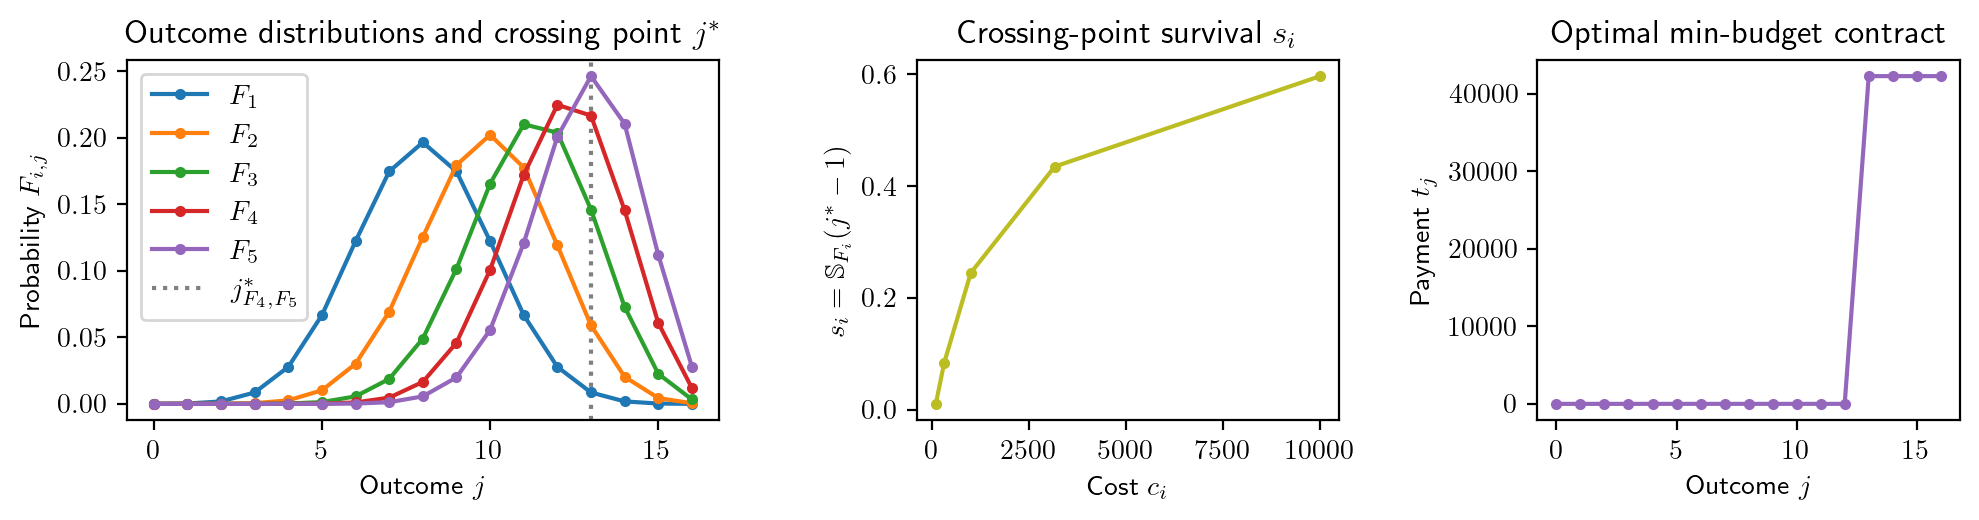

In [4]:
n_vec = np.geomspace(100,10000,5)
min_acc = 0.5
max_acc = 0.9
alpha = 0.3
acc_vec = (min_acc-max_acc)*(n_vec/min(n_vec))**-alpha + max_acc

cdp = dclf.BootstrappedBinomialMixtureContractDesignProblem(acc_vec.tolist(),n_vec.tolist(),m=16,ensure_zero_cost_action=False)
p,q = cdp.f_ij[-2:]

assert len(cdp.cost)==len(cdp.f_ij)
fig,axs=plt.subplots(1,3,figsize=(10,2.7),tight_layout={'w_pad':2},width_ratios=[1.4,1,1])
axs_it=iter(axs.ravel())

ax = next(axs_it)
for i in range(len(n_vec)):
    ax.plot(cdp.f_ij[i],'.-',label=f'$F_{{{i+1}}}$')
ax.axvline(j0(p,q),zorder=-1,label=f'$j^*_{{F_{len(n_vec)-1},F_{len(n_vec)}}}$',color='tab:gray',linestyle=':')
ax.legend()
ax.set(
    xlabel='Outcome $j$',
    ylabel='Probability $F_{i,j}$',
    title='Outcome distributions and crossing point $j^*$',
)

ax = next(axs_it)
ax.plot(cdp.cost,cdp.sf_ij[:,j0(p,q)-1],'.-',color='tab:olive')
ax.set(
    xlabel='Cost $c_i$',
    ylabel='$s_i=\\mathbb{S}_{F_i}(j^*-1)$',
    title='Crossing-point survival $s_i$',
)
ax = next(axs_it)
contract = dclf.MinBudgetContract.design(cdp)
ax.plot(contract['t'],'.-',color='tab:purple')
ax.set(
    xlabel='Outcome $j$',
    ylabel='Payment $t_j$',
    title='Optimal min-budget contract',
)

dclf.save_and_download_fig(fig, './output/crossing_point_survival.pdf')